In [ ]:
!jar xvf /content/archive.zip

 inflated: AudioWAV/1001_DFA_ANG_XX.wav
 inflated: AudioWAV/1001_DFA_DIS_XX.wav
 inflated: AudioWAV/1001_DFA_FEA_XX.wav
 inflated: AudioWAV/1001_DFA_HAP_XX.wav
 inflated: AudioWAV/1001_DFA_NEU_XX.wav
 inflated: AudioWAV/1001_DFA_SAD_XX.wav
 inflated: AudioWAV/1001_IEO_ANG_HI.wav
 inflated: AudioWAV/1001_IEO_ANG_LO.wav
 inflated: AudioWAV/1001_IEO_ANG_MD.wav
 inflated: AudioWAV/1001_IEO_DIS_HI.wav
 inflated: AudioWAV/1001_IEO_DIS_LO.wav
 inflated: AudioWAV/1001_IEO_DIS_MD.wav
 inflated: AudioWAV/1001_IEO_FEA_HI.wav
 inflated: AudioWAV/1001_IEO_FEA_LO.wav
 inflated: AudioWAV/1001_IEO_FEA_MD.wav
 inflated: AudioWAV/1001_IEO_HAP_HI.wav
 inflated: AudioWAV/1001_IEO_HAP_LO.wav
 inflated: AudioWAV/1001_IEO_HAP_MD.wav
 inflated: AudioWAV/1001_IEO_NEU_XX.wav
 inflated: AudioWAV/1001_IEO_SAD_HI.wav
 inflated: AudioWAV/1001_IEO_SAD_LO.wav
java.util.zip.ZipException: invalid code lengths set
	at java.base/java.util.zip.InflaterInputStream.read(InflaterInputStream.java:165)
	at java.base/java.util.

In [ ]:
import librosa
import numpy as np
import os

def create_spectrograms(dataset_path, target_shape=(128, 128)):
    spectrograms = []
    labels = []

    for file in os.listdir(dataset_path):
        if file.endswith('.wav'):
            audio_path = os.path.join(dataset_path, file)
            # Load audio file
            y, sr = librosa.load(audio_path, sr=None)

            # Create mel spectrogram
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=target_shape[0])
            log_S = librosa.power_to_db(S, ref=np.max)

            # Resize the spectrogram to target shape if necessary
            if log_S.shape[1] < target_shape[1]:
                # Pad with zeros if the spectrogram is smaller than the target size
                padding = np.zeros((target_shape[0], target_shape[1] - log_S.shape[1]))
                log_S = np.concatenate((log_S, padding), axis=1)
            elif log_S.shape[1] > target_shape[1]:
                # Crop the spectrogram if it is larger than the target size
                log_S = log_S[:, :target_shape[1]]

            spectrograms.append(log_S)

            # Extract label (adjust this as needed)
            label = file.split('_')[1]  # Adjust based on your filename convention
            labels.append(label)

    return np.array(spectrograms), np.array(labels)

# Set the path to your AudioWAV dataset
dataset_path = '/content/AudioWAV'
X, y = create_spectrograms(dataset_path)

# Check the output shapes
print("Spectrograms shape:", X.shape)
print("Labels shape:", y.shape)


Spectrograms shape: (22, 128, 128)
Labels shape: (22,)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform string labels to integers

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
# Define the CNN model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  # Adjust input shape as necessary
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))  # Number of classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Reshape your data for CNN input
X_train = X_train.reshape(-1, 128, 128, 1)  # Add channel dimension
X_test = X_test.reshape(-1, 128, 128, 1)    # Add channel dimension

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7059 - loss: 5.0589 - val_accuracy: 0.4000 - val_loss: 96.0080
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2353 - loss: 99.5030 - val_accuracy: 0.6000 - val_loss: 51.8794
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8235 - loss: 23.1941 - val_accuracy: 0.6000 - val_loss: 68.4950
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7647 - loss: 18.0118 - val_accuracy: 0.6000 - val_loss: 44.3447
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8824 - loss: 7.7235 - val_accuracy: 0.6000 - val_loss: 26.3054
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9412 - loss: 3.7743 - val_accuracy: 0.6000 - val_loss: 14.3305
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8235 - loss: 6.4384 - val_accuracy: 0.6000 - val_loss: 9.6188
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8824 - loss: 3.8649 - val_accuracy: 0.6000 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6000 - loss: 14.8503
Test accuracy: 0.6000000238418579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


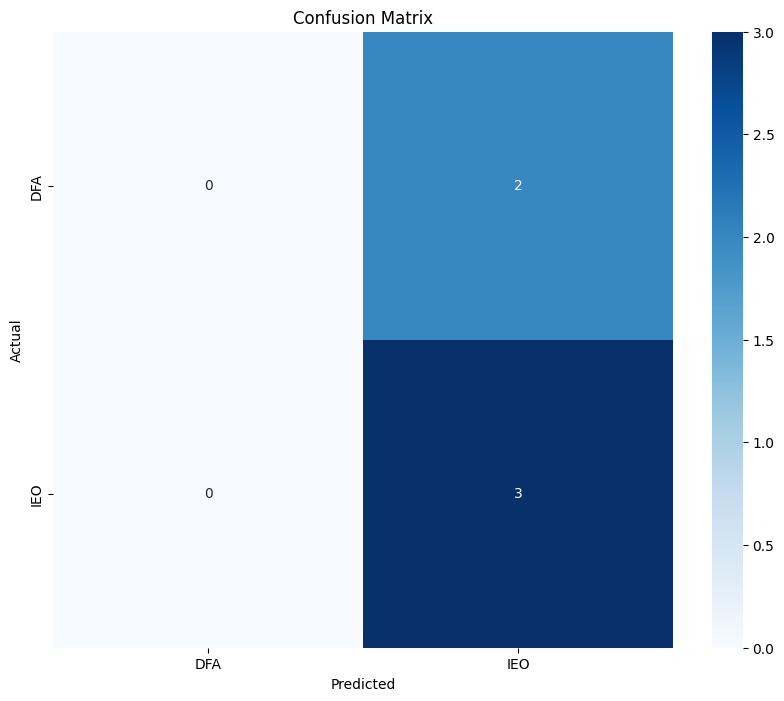

              precision    recall  f1-score   support

         DFA       0.00      0.00      0.00         2
         IEO       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# You can also visualize the results, for example with confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))
